## human judgetment ssim
---

running the human data through ssim and trained ssim network and comparing results.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from PIL import Image
import progressbar
import sys
sys.path.insert(0, '/home/dirty_mike/Dropbox/github/image_quality_analysis/bin')
import iqa_tools

In [5]:
data_path = '/home/dirty_mike/Dropbox/github/image_quality_analysis/data/'
human_df = pd.read_csv(data_path+'human_data.csv')
human_df.head()

,left_file,right_file,response_left,orig_file
0,'87_kriz_ssim_fc.png','87_kriz_mse_fc.png',1,'87_orig.png'
1,'90_kriz_mse_fc.png','90_kriz_ssim_fc.png',0,'90_orig.png'
2,'163_kriz_ssim_fc.png','163_kriz_mse_fc.png',1,'163_orig.png'
3,'69_kriz_ssim_fc.png','69_kriz_mse_fc.png',1,'69_orig.png'
4,'100_kriz_mse_fc.png','100_kriz_ssim_fc.png',0,'100_orig.png'


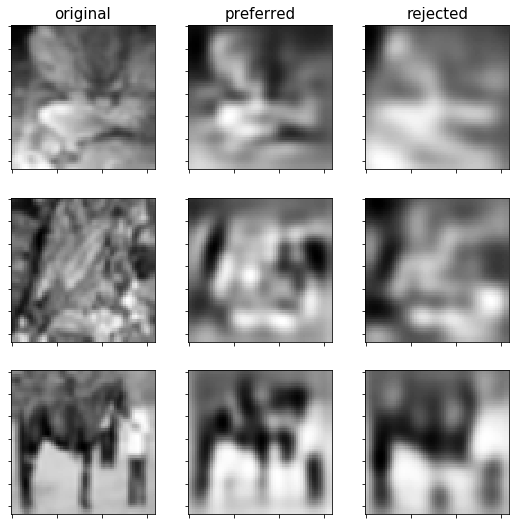

In [8]:
# data sample
f, axarr = plt.subplots(nrows=3, ncols=3, figsize=(9,9))

for ii in range(3):
    index = np.random.randint(4040)
    temp_left = mpimg.imread(data_path + 'iclr_images/' +  human_df['left_file'][index][1:-1])
    temp_right = mpimg.imread(data_path + 'iclr_images/' + human_df['right_file'][index][1:-1])
    temp_orig = mpimg.imread(data_path + 'iclr_images/' + human_df['orig_file'][index][1:-1])
    
    axarr[ii][0].imshow(temp_orig, cmap='gray')
    
    if human_df['response_left'][index] == 1:
        axarr[ii][1].imshow(temp_left, cmap='gray')
        axarr[ii][2].imshow(temp_right, cmap='gray')
    else:
        axarr[ii][2].imshow(temp_left, cmap='gray')
        axarr[ii][1].imshow(temp_right, cmap='gray')

for ax_row in axarr:
    for ax in ax_row:
        ax.set_xticklabels([])
        ax.set_yticklabels([])

axarr[0,0].set_title('original', size=15)
axarr[0,1].set_title('preferred', size=15)
axarr[0,2].set_title('rejected', size=15)

# plt.savefig('human_pref.png')
plt.show()